# Regression - Small Dataset - WITH Feature Engineering: diabetes.csv 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [3]:
df = pd.read_csv('C:/Users/Nada Abbas/Desktop/Folder for all/Epsilon AI Diploma/dastasets/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## a) Feature Transformations:

In [6]:
df['Gender'] = [0 if x==0 else 1 for x in df['Pregnancies']]
df.head() # 0: Male, 1: Female

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0


ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg. high blood pressure is considered to be 140/90mmHg or higher. low blood pressure is considered to be 90/60mmHg or lower.

In [7]:
BloodPressureCase = []
for i in df['BloodPressure']:
    if i<90:
       BloodPressureCase.append(0) # Low blood Pressure
    elif i>=90 or i<=120:
        BloodPressureCase.append(1) # Normal blood pressure
    elif i>120:
        BloodPressureCase.append(2) # high blood pressure
df['BloodPressureCase']=BloodPressureCase
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender,BloodPressureCase
0,6,148,72,35,0,33.6,0.627,50,1,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1,0
2,8,183,64,0,0,23.3,0.672,32,1,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1,0
4,0,137,40,35,168,43.1,2.288,33,1,0,0


## b) Split dataset to train and test:

In [11]:
from sklearn.model_selection import train_test_split

Y = df['Glucose']
X = df.drop(['Glucose'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state=150)

## c) Feature Scaling

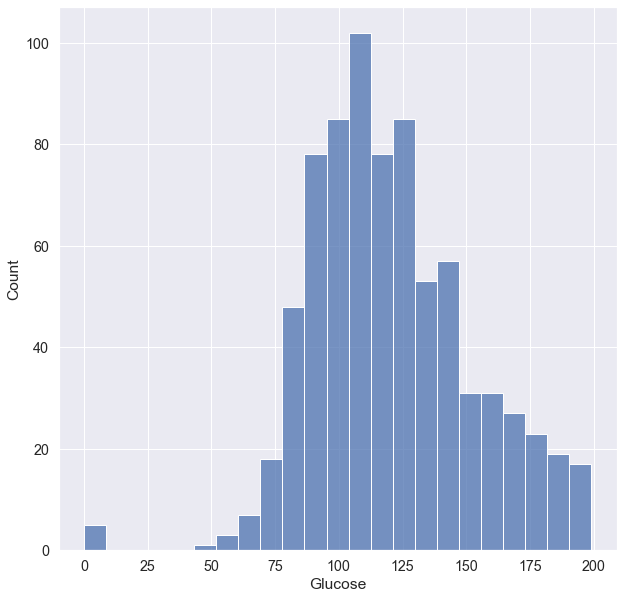

In [9]:
sns.histplot(df['Glucose'])

C:\Users\Nada Abbas\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


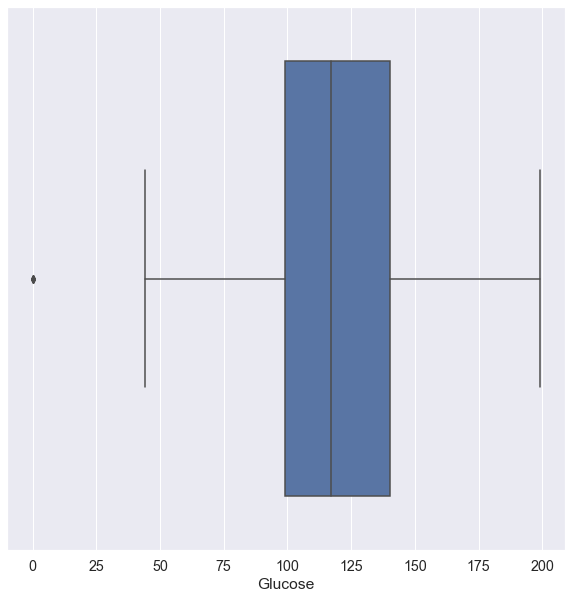

In [10]:
sns.boxplot(df['Glucose'])

In [12]:
# use minmaxscaler for feature normalization - no outliers + uniform distribution
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## 1- Gradiend Descend: Logistic Regression:

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_pred = linReg.predict(x_test)

print(f'Training Score: {linReg.score(x_train, y_train)}')
print(f'Test Score: {linReg.score(x_test, y_test)}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')

print(f'coefficients: {linReg.coef_}')
print(f'b (interception): {linReg.intercept_}')
pd.DataFrame(linReg.coef_, X.columns, columns=["Coeff"])  # lowest RMSE and highest Score

Training Score: 0.35338381221053494
Test Score: 0.31756550026661023
Root Mean Square Error: 26.16864662165594
coefficients: [ -1.41131584   5.33725947 -26.29407716  80.02844102  21.81968026
   4.39451933  26.62991166  24.57365517  -6.03216218   1.09095396]
b (interception): 95.85591951565078


,Coeff
Pregnancies,-1.411316
BloodPressure,5.337259
SkinThickness,-26.294077
Insulin,80.028441
BMI,21.819680
DiabetesPedigreeFunction,4.394519
Age,26.629912
Outcome,24.573655
Gender,-6.032162
BloodPressureCase,1.090954


## 2- Gradient Descent: Polynomial Regression:

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

linReg.fit(x_train_poly, y_train)
y_pred = linReg.predict(x_test_poly)

print(f'Training Score: {linReg.score(x_train_poly, y_train)}')
print(f'Test Score: {linReg.score(x_test_poly, y_test)}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  # hoa ezay l score ykon bel -ve asln ??
                                          # Lower value of error than linear regression

Training Score: 0.6360822124887907
Test Score: -1.6464963369892878e+19
Root Mean Square Error: 128537888071.96802


## 3- Gradient Descent: SVM - Linear: 

In [15]:
from sklearn.svm import SVR

svm = SVR(kernel='linear') # select linear kernel since the distribution of datapoints is linear
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print(f'Training Score: {svm.score(x_train, y_train)}')
print(f'Test Score: {svm.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}')  # the best output relating to the RMSE still the scores are very low
                                          # it is also strange for me that the test score is higher than the training score

Training Score: 0.26657373405469986
Test Score: 0.24461467968361317
Root Mean Square Error: 27.531827888520915


## 4- Gradient Descent: SVM - Polynomial:

In [16]:
svm = SVR(kernel='poly') # just testing for polynomial SVM since it gave better results in Regression
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test) # very slow model

print(f'Training Score: {svm.score(x_train, y_train)}')
print(f'Test Score: {svm.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}') 

Training Score: 0.32235572991459793
Test Score: 0.27226090293780447
Root Mean Square Error: 27.02331535512597


## 5- Decision Tree:

In [17]:
from sklearn.tree import DecisionTreeRegressor

DecTree = DecisionTreeRegressor()
DecTree.fit(x_train, y_train)
y_pred = DecTree.predict(x_test)

print(f'Training Score: {DecTree.score(x_train, y_train)}')
print(f'Test Score: {DecTree.score(x_test, y_test)}') 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error: {rmse}') # a great example of over fitting

Training Score: 1.0
Test Score: -0.2986221008207359
Root Mean Square Error: 36.0987505554786


# Select Linear Regression for this data - then could use polynomial SVM

#### with Feature Engineering:
- Training Score: 0.35338381221053494
- Test Score: 0.31756550026661023
- Root Mean Square Error: 26.16864662165594

#### Without Feature Engineering:
- Training Score: 0.3500144988594712
- Test Score: 0.3184635275199229
- Root Mean Square Error: 26.151423068323158

## Select with feature engineering since it has slightly higher score